In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import scipy
import calendar

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
StockName='AMD'

In [3]:
start = datetime.date.today() - datetime.timedelta(days=365)
end = datetime.date.today()
Stock = data.DataReader(StockName, 'google', start, end)


'''
start = datetime.date.today() - datetime.timedelta(days=65)
end = datetime.date.today()
start = '2015-1-2'
end = '2015-12-31'

'''

"\nstart = datetime.date.today() - datetime.timedelta(days=65)\nend = datetime.date.today()\nstart = '2015-1-2'\nend = '2015-12-31'\n\n"

In [4]:
Stock.columns.names = ['Stock Info']
Stock.head()

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2016-04-11,2.76,2.82,2.74,2.76,9031849
2016-04-12,2.79,2.85,2.76,2.81,16110067
2016-04-13,2.78,2.82,2.73,2.80,8047063
2016-04-14,2.77,2.79,2.70,2.72,8935350
2016-04-15,2.72,2.75,2.68,2.70,7482492


# Rolling Averages Section

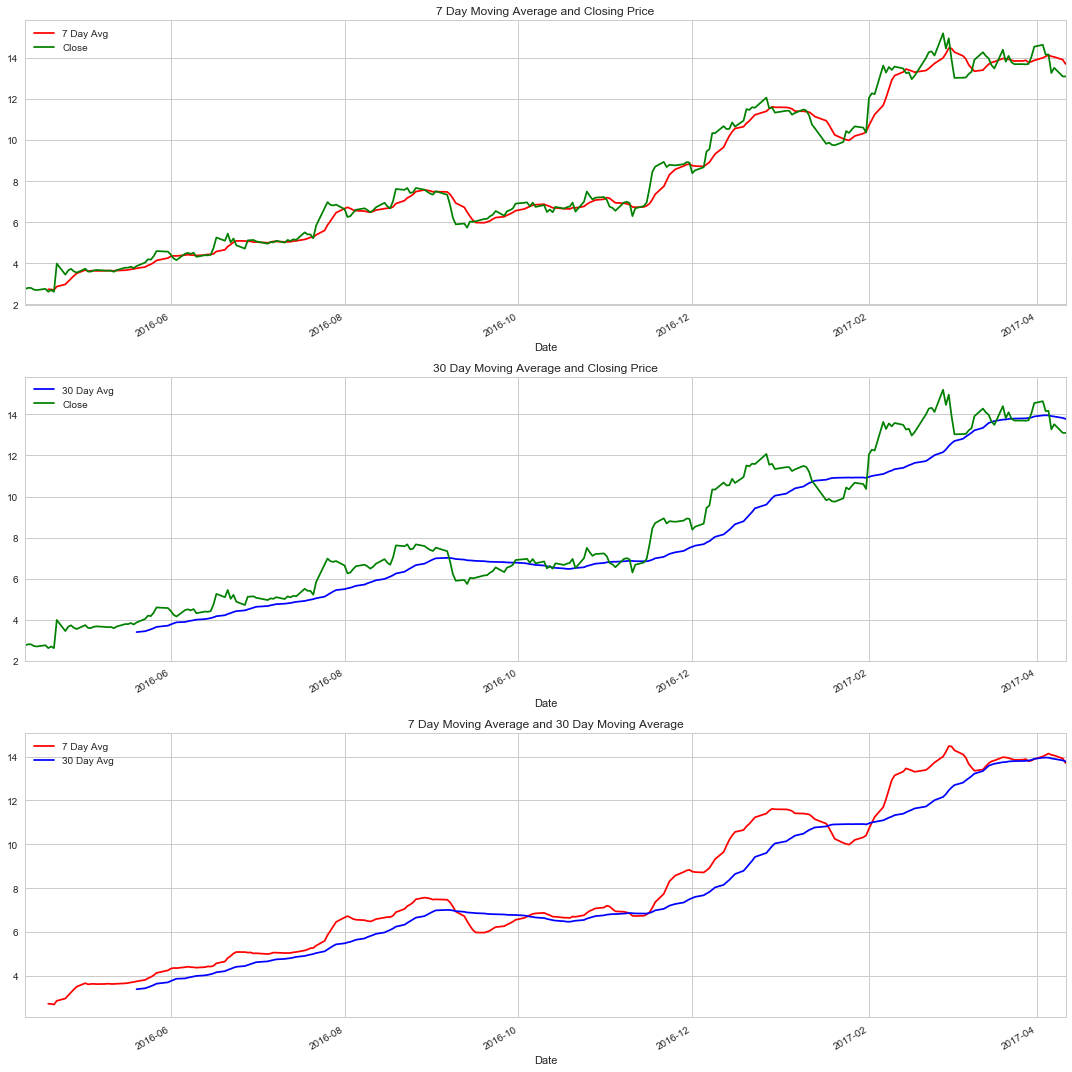

In [5]:
plt.figure(figsize=(15,15))
plt.subplot(311)
Stock['Close'].rolling(window=7).mean().plot(label='7 Day Avg',color='r')
Stock['Close'].plot(label='Close',color='g')
plt.title('7 Day Moving Average and Closing Price')
plt.legend()

plt.subplot(312)
Stock['Close'].rolling(window=30).mean().plot(label='30 Day Avg',color='b')
Stock['Close'].plot(label='Close',color='g')
plt.title('30 Day Moving Average and Closing Price')
plt.legend()

plt.subplot(313)
Stock['Close'].rolling(window=7).mean().plot(label='7 Day Avg',color='r')
Stock['Close'].rolling(window=30).mean().plot(label='30 Day Avg',color='b')
plt.title('7 Day Moving Average and 30 Day Moving Average')
plt.legend()

plt.tight_layout()


# Moving Average Convergence Divergence (MACD)  Section

Setting EMA values

In [6]:
EMA_len=[12,26,9]

Initial Expontial Moving Averages (EMA) Calculation

In [7]:
EMA_12=2/(EMA_len[0]+1)*(Stock['Close'][EMA_len[0]])+(1-2/(EMA_len[0]+1))*Stock['Close'][0:EMA_len[0]].mean()

In [8]:
EMA_26=2/(EMA_len[1]+1)*(Stock['Close'][EMA_len[1]])+(1-2/(EMA_len[1]+1))*Stock['Close'][0:EMA_len[1]].mean()

Determining EMA values

In [9]:
ema12=[]
for i in range(0,len(Stock['Close'])):
    if i<EMA_len[0]:
        ema12.append(np.nan)
    else:
        ema12.append(EMA_12)
        EMA_12=(2/(EMA_len[0]+1))*Stock['Close'][i]+(1-2/(EMA_len[0]+1))*EMA_12

In [10]:
ema26=[]
for i in range(0,len(Stock['Close'])):
    if i<=EMA_len[1]:
        ema26.append(np.nan)
    else:
        ema26.append(EMA_26)
        EMA_26=(2/(EMA_len[1]+1))*Stock['Close'][i]+(1-2/(EMA_len[1]+1))*EMA_26

In [11]:
Stock['MACD']=np.array(ema12)-np.array(ema26)

Calculating Initial Signal Value

In [12]:
Signal=2/(EMA_len[2]+1)*(Stock['MACD'][EMA_len[1]+EMA_len[2]])+(1-2/(EMA_len[2]+1))*Stock['MACD'][EMA_len[1]:EMA_len[1]+EMA_len[2]].mean()

In [13]:
signal=[]
for i in range(0,len(Stock['Close'])):
    if i<=EMA_len[1]+EMA_len[2]:
        signal.append(np.nan)
    else:
        signal.append(Signal)
        Signal=(2/(EMA_len[2]+1))*Stock['MACD'][i]+(1-2/(EMA_len[2]+1))*Signal

In [14]:
Stock['Signal']=signal

In [15]:
Stock['MACD_Hist']=(Stock['MACD']-Stock['Signal'])

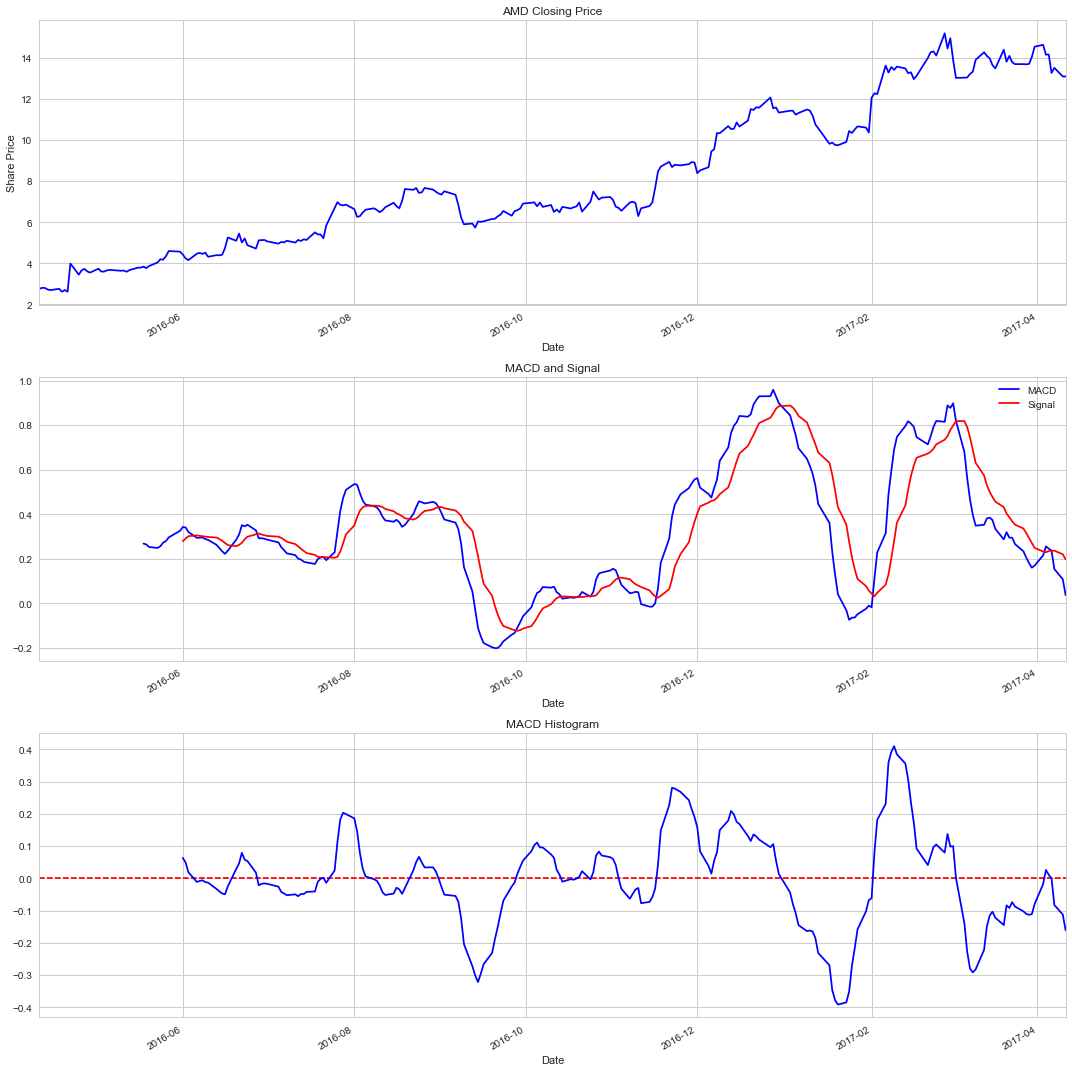

In [16]:
plt.figure(figsize=(15,15))
plt.subplot(311)
Stock['Close'].plot(label='Close',color='b')
plt.title('{} Closing Price'.format(StockName))
plt.ylabel('Share Price')

plt.subplot(312)
Stock['MACD'].plot(label='MACD',color='b')
Stock['Signal'].plot(label='Signal',color='r')
plt.title('MACD and Signal')
plt.legend()

len(Stock['MACD_Hist'])

plt.subplot(313)
ax=Stock['MACD_Hist'].plot(label='MACD_Hist',color='b')
plt.hlines(0,start,end, color='r',linestyles='--')
plt.title('MACD Histogram')


plt.tight_layout()

## Relative Strength Index (RSI)

Determining changes in closing price

In [17]:
diff_close=[]
for i in range(0,len(Stock['Close'])):
    if i >0:
        diff_close.append(Stock.iloc[i]['Close']-Stock.iloc[i-1]['Close'])
    else:
        diff_close.append(np.nan)

In [18]:
interval=14

Binning gains and losses

In [19]:
RS_pos=[]
RS_neg=[]
for i in range(0,len(Stock['Close'])):
    if diff_close[i]>0:
        RS_pos.append(diff_close[i])
        RS_neg.append(0)
    elif diff_close[i]<0:
        RS_pos.append(0)
        RS_neg.append(diff_close[i]*-1)
    else:
        RS_pos.append(0)
        RS_neg.append(0)

In [20]:
rs_plus=(np.array(RS_pos)[0:interval].sum())/interval
rs_neg=(np.array(RS_neg)[0:interval].sum())/interval

Smoothed Average Gain and Average Loss calculation 

In [21]:
rsp=[]
rsn=[]
for i in range(0,len(Stock['Close'])):
    if i >13:
        rsp.append(rs_plus)
        rsn.append(rs_neg)
        rs_plus=(rs_plus*13+RS_pos[i])/interval
        rs_neg=(rs_neg*13+RS_neg[i])/interval
    else:
        rsp.append(0)
        rsn.append(0)

In [22]:
RS=np.array(rsp)/np.array(rsn)

C:\Users\shane\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [23]:
Stock['RSI']=100-(100/(1+(np.array(RS))))

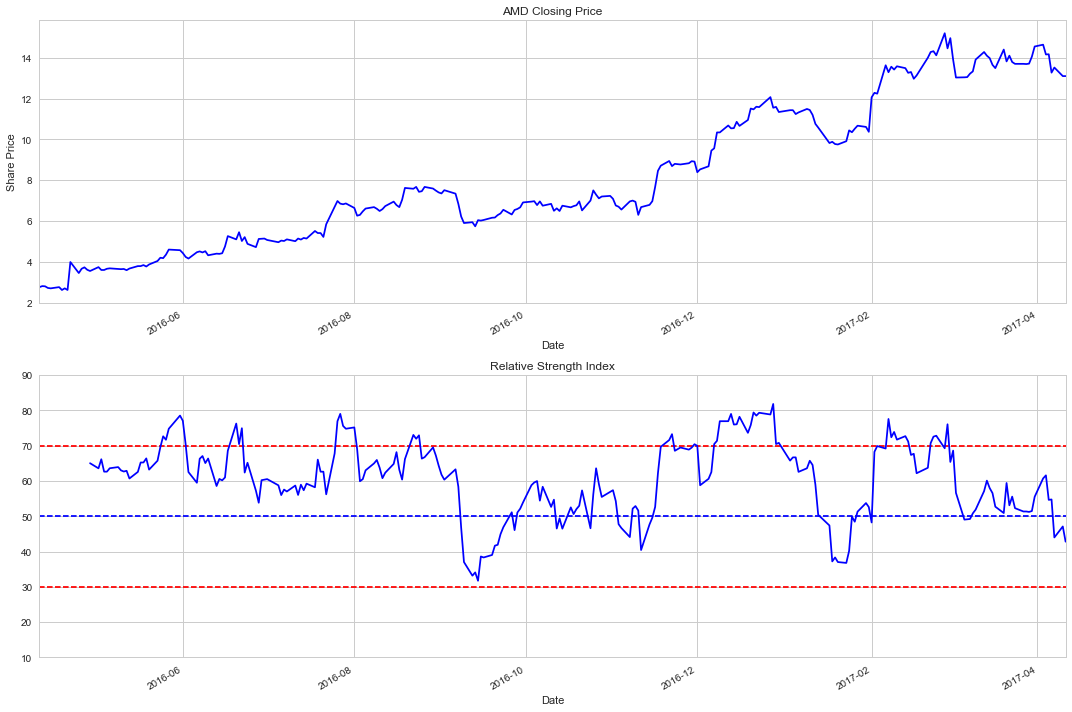

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(211)
Stock['Close'].plot(label='Close',color='b')
plt.title('{} Closing Price'.format(StockName))
plt.ylabel('Share Price')

plt.subplot(212)
plt.title('Relative Strength Index')
Stock['RSI'].plot(label='RSI',color='b')
plt.hlines(70,start,end, color='r',linestyles='--')
plt.hlines(50,start,end, color='b',linestyles='--')
plt.hlines(30,start,end, color='r',linestyles='--')
plt.ylim((10,90))

plt.tight_layout()